In [1]:
! pip install plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/5b/b5/fb81914804ad0d8e4a53118df343efdba1562de13275189cf2228ef8e3c1/plotnine-0.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ae/d9/3741b344f57484b423cd22194025a8489992ad9962196a62721ef9980045/pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for mizani from https://files.pythonhosted.org/packages/24/db/0bf4870bdc44876172ce7b3dc2fe3d1e15523cc90aafe3996efa9e8ab078/mizani-0.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib>=3.6.0 from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for mizani from https://files.pythonhosted.org/packages/e2/95/d4e33d3f5bc9fee5512637661208b6b595bda58e9b6a66fa867137761dd7/mizani-0.9.3-py


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



# Articles:
# https://www.kaggle.com/code/residentmario/grammar-of-graphics-with-plotnine-optional?scriptVersionId=4327772
# https://pythonplot.com/


# https://realpython.com/ggplot-python/
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

economics

(
        ggplot(economics)  # What data to use
        + aes(x="date", y="pop")  # What variable to use
        + geom_line()  # Geometric object to use for drawing
)

In [2]:
import pandas as pd

from data import csv_data

#csv_data

# Calculate additional columns:
csv_data['Add Rate'] = csv_data['Item Count'] * 1_000_000_000 / csv_data['Add Duration Nanos']
csv_data['Search Rate'] = csv_data['Query Count'] * 1_000_000_000 / csv_data['Search Duration Nanos']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data[['Class Info', 'Algorithm Test']] = csv_data['Class'].str.split(pat='$', expand=True)
csv_data['Algorithm'] = csv_data['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data = csv_data[csv_data['Scenario'] != 'Warmup']


csv_data


,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,file,Add Rate,Search Rate,Class Info,Algorithm Test,Algorithm
1,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,1000,1000,166700,10000,1664200,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.998800e+06,6.008893e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
2,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[3] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,2000,2000,343900,10000,1975000,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.815644e+06,5.063291e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
3,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[4] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,3000,3000,525200,10000,1740400,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.712110e+06,5.745806e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
4,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[5] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,4000,4000,629400,10000,1782800,2023-12-18-21-28-33_index_Random_Gaussian.stats,6.355259e+06,5.609154e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
5,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[6] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,5000,5000,886300,10000,88666300,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.641431e+06,1.127824e+05,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[34] Random Linear Sampling Scenario = Large S...,2023-12-21T19:25:29.0551178,1000000.0,10000,Large Some,6000000,6000000,13545097885,10000,8707276,2023-12-21-19-25-29_index_Random_Linear.stats,4.429647e+05,1.148465e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
834,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[35] Random Linear Sampling Scenario = Large S...,2023-12-21T19:25:29.0551178,1000000.0,10000,Large Some,7000000,7000000,15270996577,10000,8843495,2023-12-21-19-25-29_index_Random_Linear.stats,4.583853e+05,1.130775e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
835,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[36] Random Linear Sampling Scenario = Large S...,2023-12-21T19:25:29.0551178,1000000.0,10000,Large Some,8000000,8000000,17507027337,10000,9154097,2023-12-21-19-25-29_index_Random_Linear.stats,4.569594e+05,1.092407e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
836,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[37] Random Linear Sampling Scenario = Large S...,2023-12-21T19:25:29.0551178,1000000.0,10000,Large Some,9000000,9000000,24344581634,10000,10329997,2023-12-21-19-25-29_index_Random_Linear.stats,3.696921e+05,9.680545e+05,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo


In [3]:

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data['Scenario'].unique()

plot_data = csv_data.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)
plot_data.head()




,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,file,Add Rate,Search Rate,Class Info,Algorithm Test,Algorithm,scenario
1,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,1000,1000,166700,10000,1664200,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.998800e+06,6.008893e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree,Tiny Some
2,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[3] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,2000,2000,343900,10000,1975000,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.815644e+06,5.063291e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree,Tiny Some
3,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[4] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,3000,3000,525200,10000,1740400,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.712110e+06,5.745806e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree,Tiny Some
4,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[5] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,4000,4000,629400,10000,1782800,2023-12-18-21-28-33_index_Random_Gaussian.stats,6.355259e+06,5.609154e+06,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree,Tiny Some
5,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[6] Random Gaussian Sampling Scenario = Tiny S...,2023-12-18T21:28:33.7539679,1000000.0,10000,Tiny Some,5000,5000,886300,10000,88666300,2023-12-18-21-28-33_index_Random_Gaussian.stats,5.641431e+06,1.127824e+05,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree,Tiny Some


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

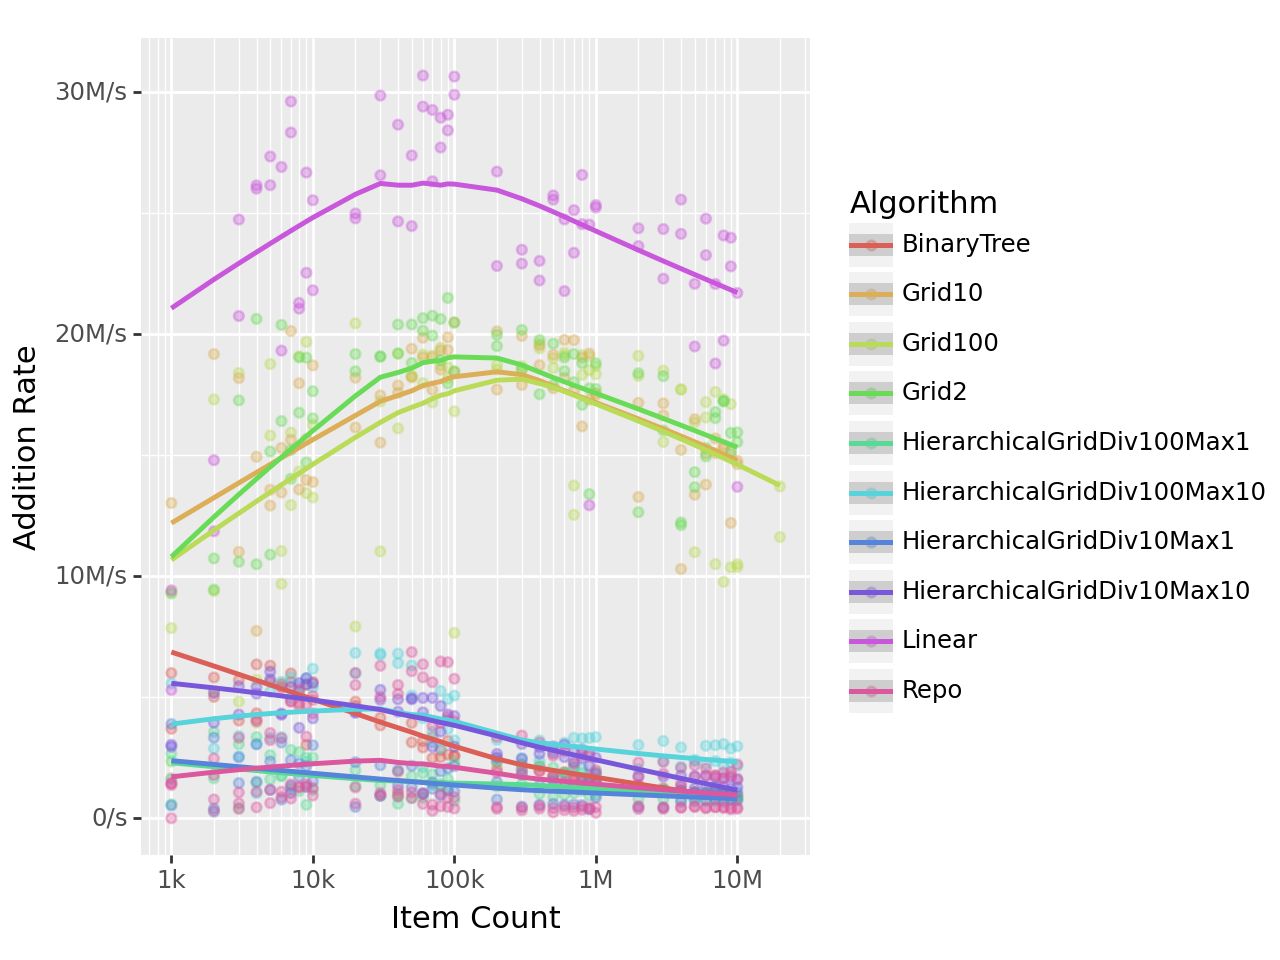

<Figure Size: (640 x 480)>

In [4]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, ggplot, \
    aes, geom_point

(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Addition Rate')
 )

[autoreload of data failed: Traceback (most recent call last):
  File "C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Python312\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 860, in _exec
  File "<frozen importlib._bootstrap_external>", line 994, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "C:\Source\nanovc-java-kdrepo\analysis\performance\data\__init__.py", line 22, in <module>
    for f in files:
             ^^^^^
NameError: name 'files' is not defined. Did you mean: 'filter'?
]
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330

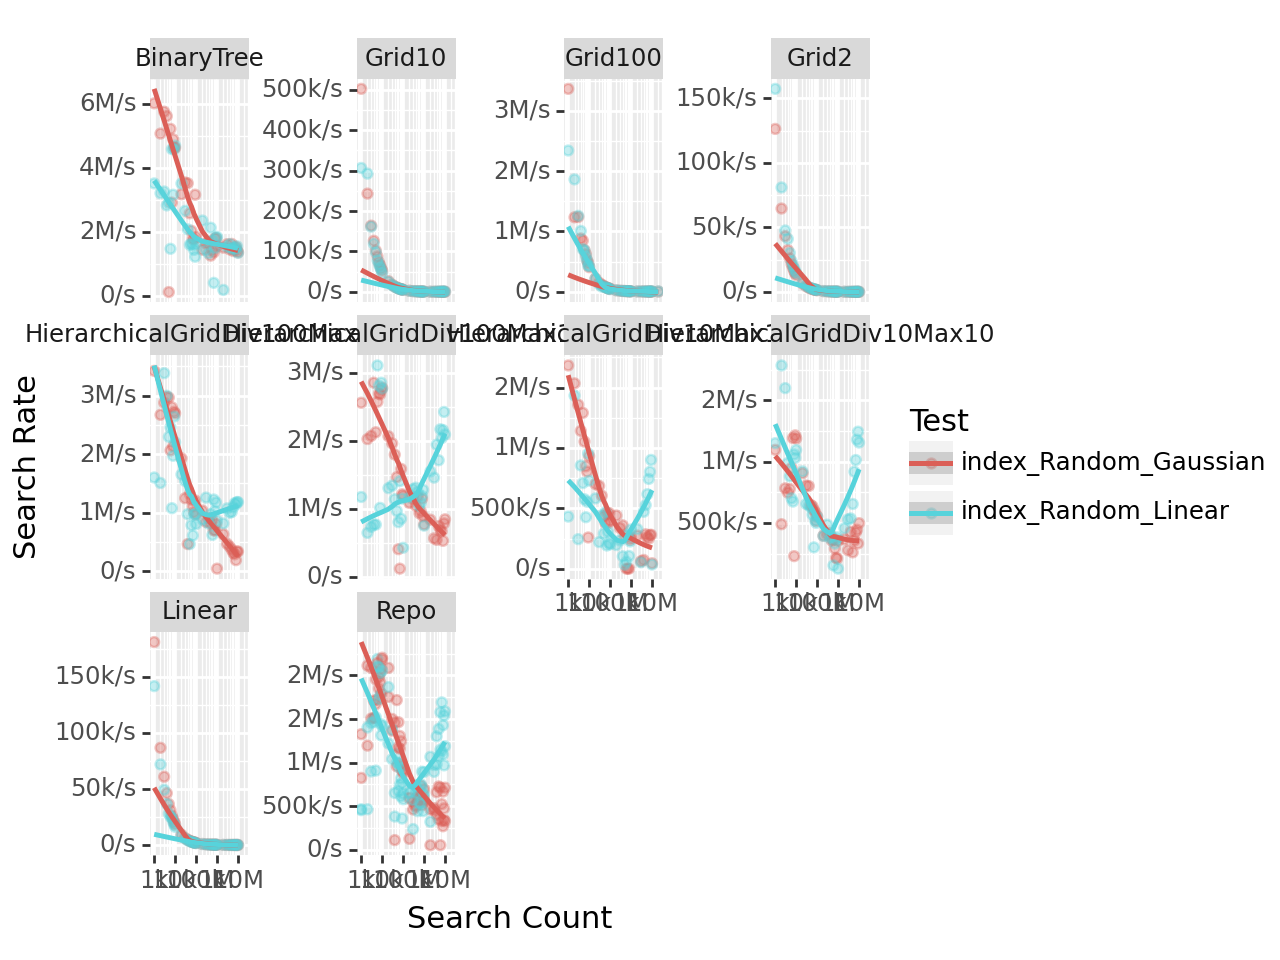

<Figure Size: (640 x 480)>

In [5]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import ggplot, scale_x_log10, geom_smooth, labs, scale_y_continuous, facet_wrap

(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + facet_wrap("Algorithm", scales="free_y")
 + labs(x='Search Count', y='Search Rate')
 )

2k


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


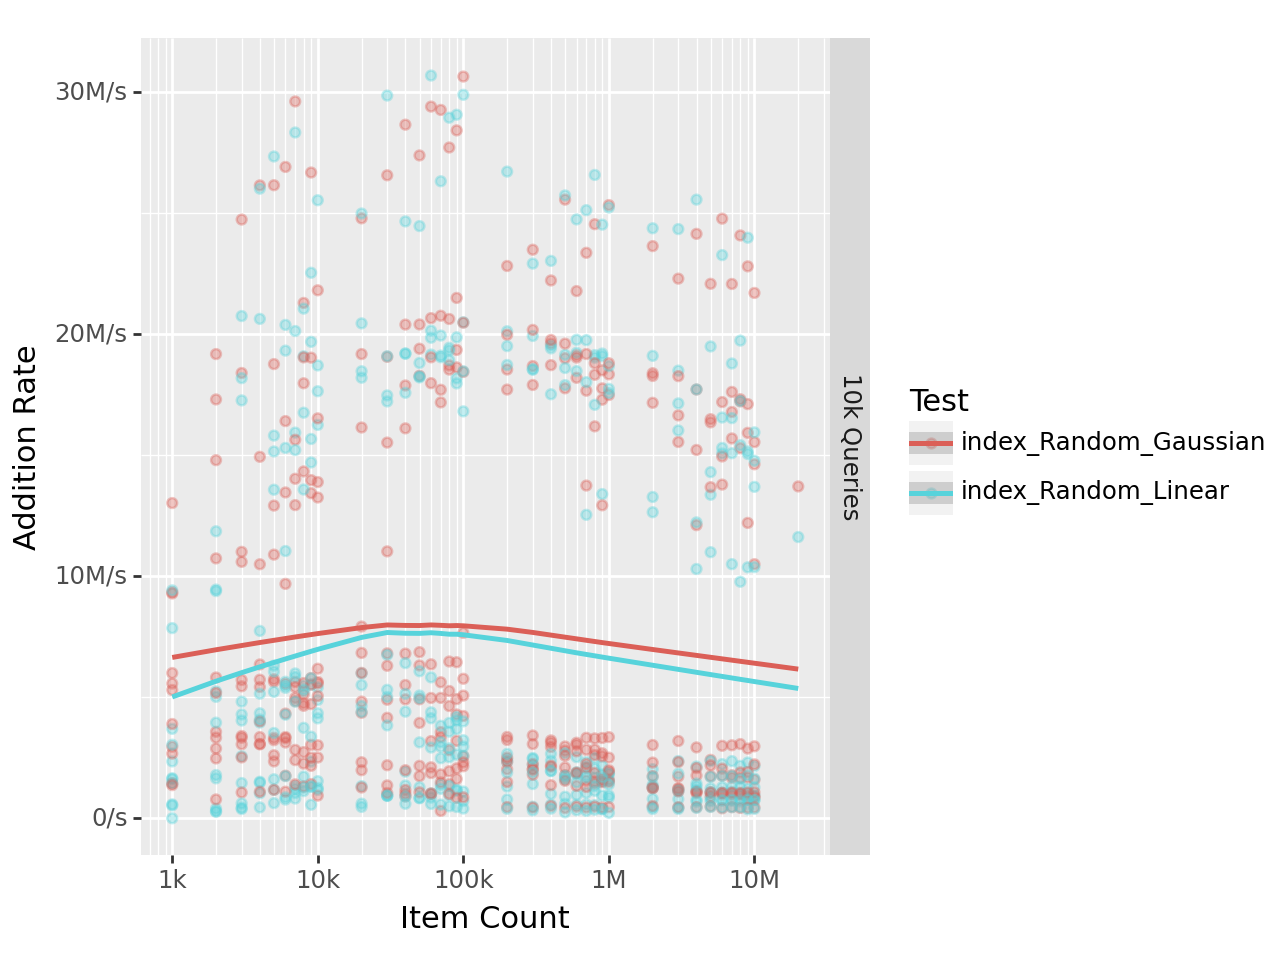

<Figure Size: (640 x 480)>

In [6]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, geom_smooth, labs, scale_y_continuous, \
    facet_grid

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


pretty_Format = number_suffix_format(fmt="{:.0f}")

print (pretty_Format([2134])[0])

def pretty_labeller(x):
    return pretty_Format([int(x)])[0] + " Queries"

(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Addition Rate')
 + facet_grid("Query Count ~ .", labeller=pretty_labeller)
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

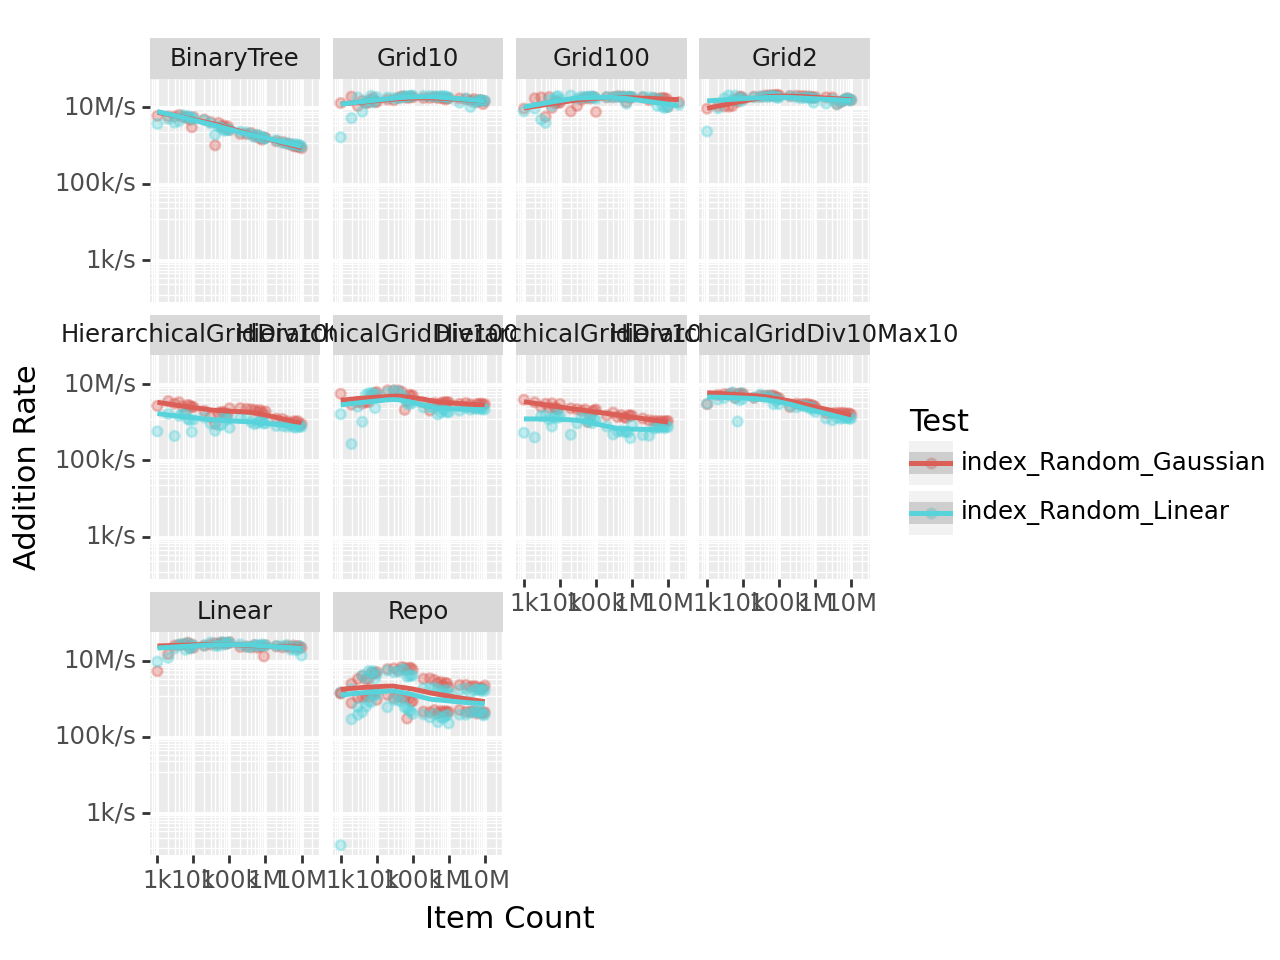

<Figure Size: (640 x 480)>

In [7]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Addition Rate')
 + facet_wrap("Algorithm")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

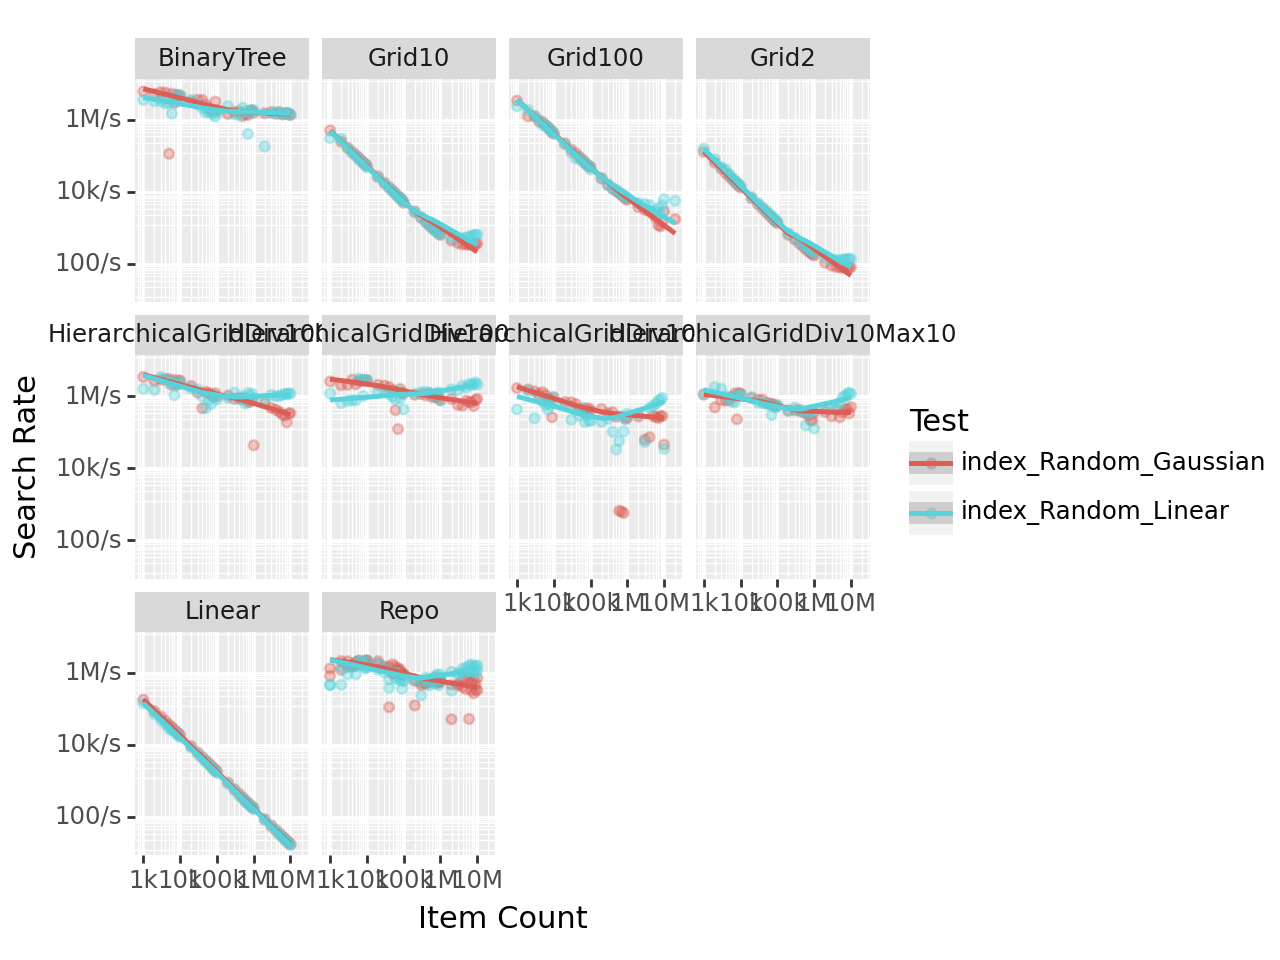

<Figure Size: (640 x 480)>

In [8]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 #+ facet_wrap("Algorithm", scales="free_y")
 + facet_wrap("Algorithm", scales="fixed")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

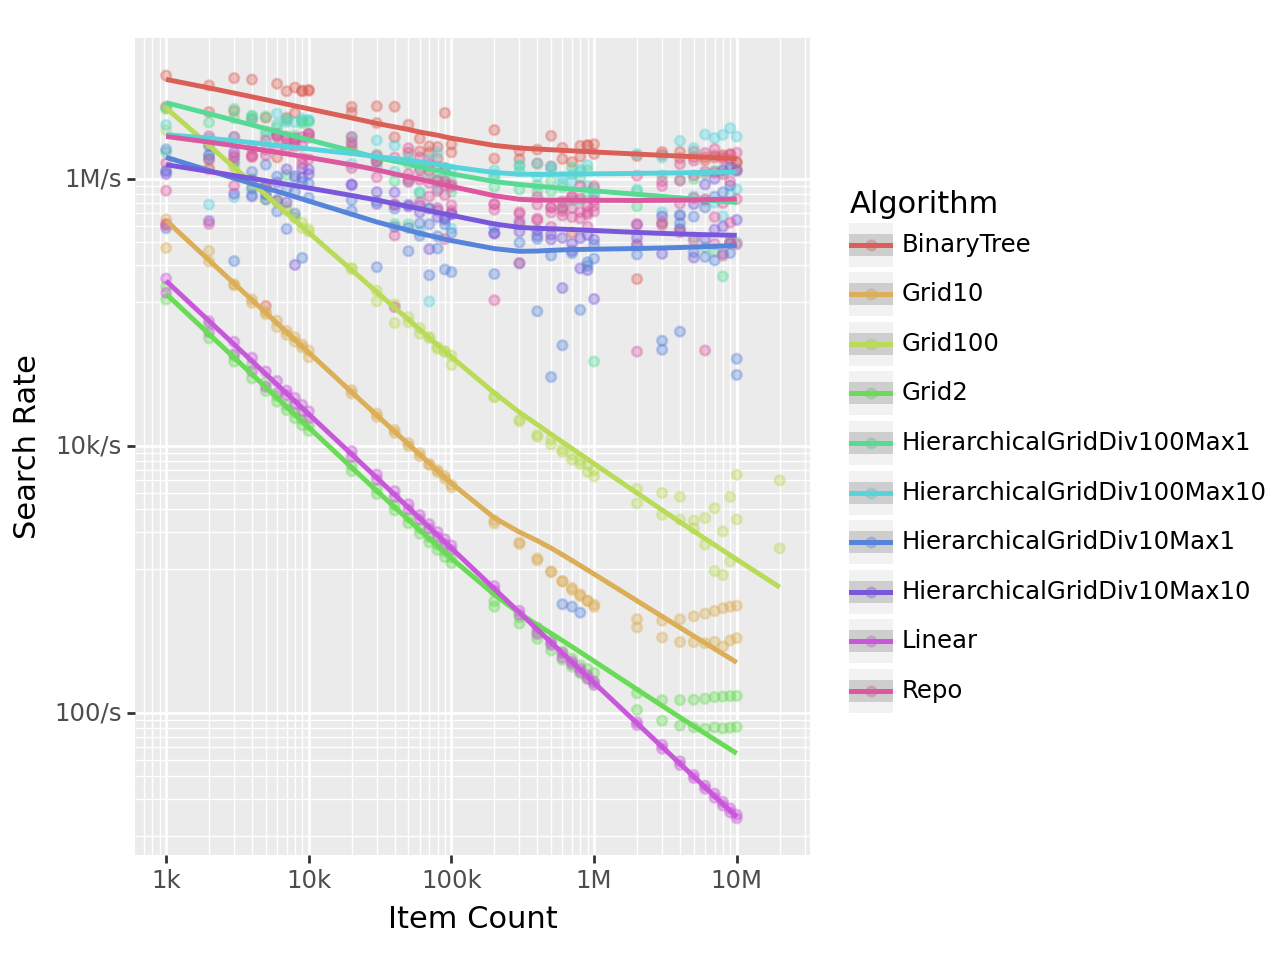

<Figure Size: (640 x 480)>

In [9]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 #+ facet_wrap("Test", scales="fixed")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

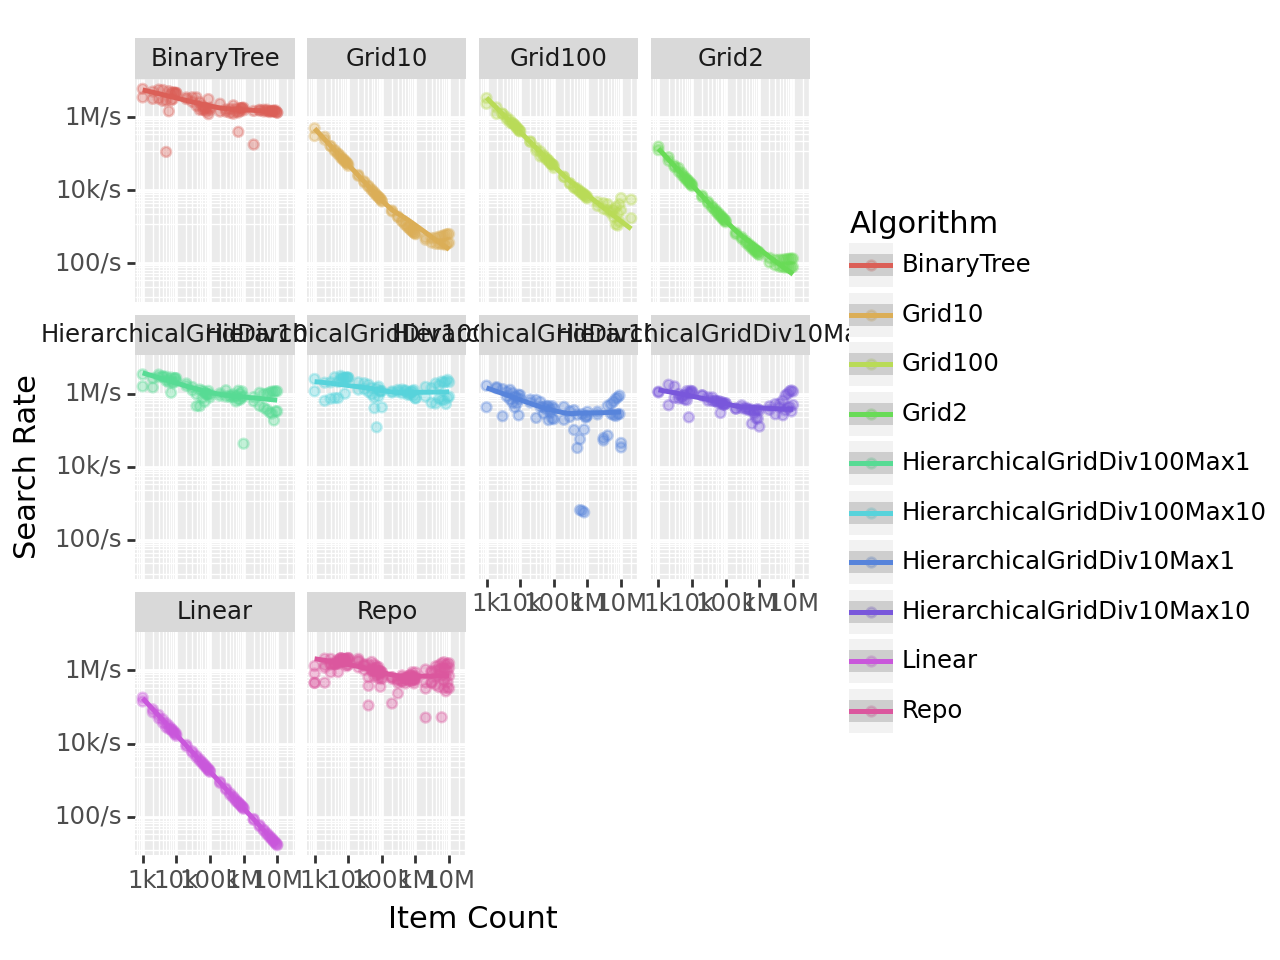

<Figure Size: (640 x 480)>

In [10]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 + facet_wrap("Algorithm", scales="fixed")
 )